In [1]:
# get the osm energy data for Texas
import osmnx as ox
import geopandas as gpd
import pandas as pd
import requests
from pathlib import Path

In [8]:

place = "Texas, USA"
tags = {
    "power": "generator",
    "generator:source": ["wind", "solar"]
}

# Fetch geometries (points, lines, polygons) that match these tags
gdf = ox.features_from_place(place, tags)

# Filter and rename columns for clarity
gdf = gdf[[
    'power',
    'generator:source',
    'generator:method',
    'generator:output:electricity',
    'name',
    'geometry'
]]

# Reset index
gdf = gdf.reset_index(drop=True)




c:\Users\stuar\Desktop\Renewable Energy Maintenance\renv\lib\site-packages\osmnx\_overpass.py:267: UserWarning: This area is 383 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


In [9]:
# Convert to a regular DataFrame without geometry (optional)
df = pd.DataFrame(gdf)

# Show the result
print(df.head())

       power generator:source generator:method generator:output:electricity  \
0  generator             wind     wind_turbine                       1.5 MW   
1  generator             wind     wind_turbine                       1.5 MW   
2  generator             wind     wind_turbine                       1.5 MW   
3  generator             wind     wind_turbine                       1.5 MW   
4  generator             wind     wind_turbine                       1.5 MW   

  name                    geometry  
0  NaN  POINT (-99.98445 32.33876)  
1  NaN  POINT (-99.98613 32.33276)  
2  NaN  POINT (-99.98842 32.33274)  
3  NaN  POINT (-99.99057 32.33279)  
4  NaN  POINT (-99.99259 32.33332)  


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60982 entries, 0 to 60981
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   power                         60737 non-null  object  
 1   generator:source              60907 non-null  object  
 2   generator:method              58762 non-null  object  
 3   generator:output:electricity  57679 non-null  object  
 4   name                          827 non-null    object  
 5   geometry                      60982 non-null  geometry
dtypes: geometry(1), object(5)
memory usage: 2.8+ MB


In [11]:
df_copy = df.copy()

In [12]:
df_copy.drop_duplicates(inplace=True)

In [13]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60858 entries, 0 to 60981
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   power                         60613 non-null  object  
 1   generator:source              60783 non-null  object  
 2   generator:method              58642 non-null  object  
 3   generator:output:electricity  57559 non-null  object  
 4   name                          827 non-null    object  
 5   geometry                      60858 non-null  geometry
dtypes: geometry(1), object(5)
memory usage: 3.3+ MB


In [17]:
df_copy.head(1)

,power,generator:source,generator:method,generator:output:electricity,name,geometry
0,generator,wind,wind_turbine,1.5 MW,NaN,POINT (-99.98445 32.33876)


In [18]:
df_copy['name'].unique()

array([nan, 'Plant X unit #1', 'Plant X unit #2', 'Plant X unit #3',
       'Plant X unit #4', 'zonderrr', 'Falcon Power Plant Unit 1',
       'Falcon Power Plant Unit 2', 'Falcon Power Plant Unit 3',
       'Starcke Dam Unit 2', 'Starcke Dam Unit 1', 'Wirtz Dam Unit 2',
       'Wirtz Dam Unit 1', 'Buchanan Dam Unit 1', 'Buchanan Dam Unit 2',
       'Buchanan Dam Unit 3', 'Inks Dam', 'Formosa Unit 10',
       'Formosa Unit 7', 'Formosa Unit 6',
       'Victoria Power Station Unit 5', 'Tower 118',
       'Peyton Creek Wind Farm', 'Austin Generator Service', 'Tower 139',
       'Tower 133', 'Tower 104', 'Tower 109', 'Tower 117', 'Tower 140',
       'Tower 135', 'Tower 163', 'Tower 114', 'Tower 129', 'Tower 152',
       'Tower 157', 'Tower 160', 'Tower 148', 'Tower 106', 'Tower 103',
       'Tower 113', 'Tower 158', 'Tower 141', 'Tower 124', 'Tower 136',
       'Tower 154', 'Tower 125', 'Tower 105', 'Tower 130', 'Tower 147',
       'Tower 132', 'Tower 155', 'Tower 162', 'Tower 149', 'Towe

In [19]:
df_copy['generator:source'].unique()

array(['wind', 'coal', 'gas', nan, 'hydro', 'solar', 'nuclear', 'steam',
       'oil', 'biomass', 'diesel', 'battery'], dtype=object)

In [20]:
# drop value for generator:source that is not wind or solar
df_copy = df_copy[df_copy['generator:source'].isin(['wind', 'solar'])]

In [26]:
df_copy['generator:source'].unique()

array(['wind', 'solar'], dtype=object)

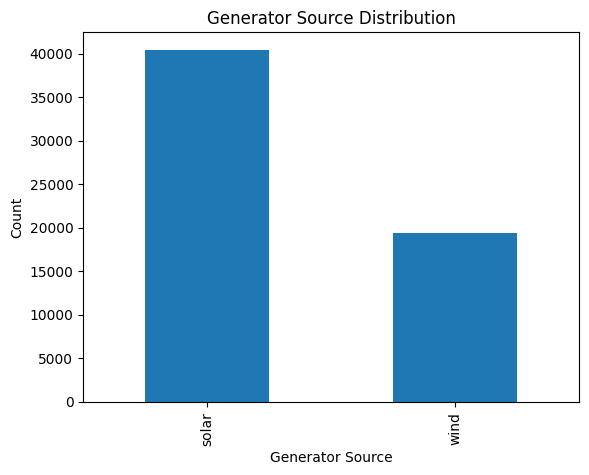

In [25]:
import matplotlib.pyplot as plt

df_copy['generator:source'].value_counts().plot(kind='bar', title='Generator Source Distribution')
plt.xlabel('Generator Source')
plt.ylabel('Count')
plt.show()

In [27]:
df_copy.head(3)

,power,generator:source,generator:method,generator:output:electricity,name,geometry
0,generator,wind,wind_turbine,1.5 MW,NaN,POINT (-99.98445 32.33876)
1,generator,wind,wind_turbine,1.5 MW,NaN,POINT (-99.98613 32.33276)
2,generator,wind,wind_turbine,1.5 MW,NaN,POINT (-99.98842 32.33274)


In [37]:
df_copy_drop = df_copy.copy()

In [39]:
# drop rows where name is nan
df_copy_drop.dropna(subset=['name'], inplace=True)

In [40]:
df_copy_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 6282 to 21810
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   power                         683 non-null    object  
 1   generator:source              683 non-null    object  
 2   generator:method              683 non-null    object  
 3   generator:output:electricity  574 non-null    object  
 4   name                          683 non-null    object  
 5   geometry                      683 non-null    geometry
dtypes: geometry(1), object(5)
memory usage: 37.4+ KB


In [41]:
df_copy_drop.head(4)

,power,generator:source,generator:method,generator:output:electricity,name,geometry
6282,generator,wind,wind_turbine,2.3 MW,zonderrr,POINT (-102.16526 35.24556)
15847,generator,wind,wind_turbine,NaN,Tower 118,POINT (-99.28338 27.15668)
16105,generator,wind,wind_turbine,3.15 MW,Peyton Creek Wind Farm,POINT (-95.89059 28.87284)
16106,generator,wind,wind_turbine,3.15 MW,Peyton Creek Wind Farm,POINT (-95.87789 28.87664)
